In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from pylab import rcParams
import sklearn
import urllib
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir("drive/My Drive/using/")
os.listdir()

Mounted at /content/drive


['known.csv',
 'hg38v79_genes_TSS2kb.pc',
 'loc_to_cgi (3).csv',
 'dataset_new.csv',
 'promoter.csv']

In [42]:
df = pd.read_csv('dataset_new.csv')
dummies = pd.get_dummies(df.loc_to_cgi)
merged = pd.concat([df,dummies],axis='columns')
final = merged.drop(['Unnamed: 0','loc_to_cgi'], axis='columns')


In [43]:
df

,Unnamed: 0,chromosome number,start position,end position,fraction of reads have dna methylation,loc_to_cgi
0,0,15,17000043,17000045,NaN,False
1,1,15,17000186,17000188,0.416667,False
2,2,15,17000252,17000254,0.914286,False
3,3,15,17000408,17000410,0.670732,False
4,4,15,17000423,17000425,0.978495,False
...,...,...,...,...,...,...
897759,897759,15,101980785,101980787,0.897959,False
897760,897760,15,101980791,101980793,0.843137,False
897761,897761,15,101980797,101980799,0.905660,False
897762,897762,15,101980811,101980813,0.672727,False


In [44]:
nan_value = float("NaN")
final.replace("", nan_value, inplace=True)
final.dropna(subset = ["fraction of reads have dna methylation"], inplace=True)
#final= final.reset_index()
final
##df = df.replace("", nan_value, inplace = True)
##df.dropna(subset = ['fraction of reads have dna methylation'], inplace = True)
##df = df.dropna(subset = ['fraction of reads have dna methylation'], inplace = True)
##df
df = df.dropna()
df = df.reset_index()
df = df.drop(['Unnamed: 0','chromosome number','end position'], axis='columns')
df

,index,start position,fraction of reads have dna methylation,loc_to_cgi
0,1,17000186,0.416667,False
1,2,17000252,0.914286,False
2,3,17000408,0.670732,False
3,4,17000423,0.978495,False
4,5,17000530,0.756522,False
...,...,...,...,...
855010,897759,101980785,0.897959,False
855011,897760,101980791,0.843137,False
855012,897761,101980797,0.905660,False
855013,897762,101980811,0.672727,False


In [18]:
final

In [45]:

best = 0
for i in range(100):
  train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
  x_train = train.iloc[:,[1,3]].values
  y_train = train.iloc[:,2].values
  x_validate = validate.iloc[:,[1,3]].values
  y_validate = validate.iloc[:,2].values
  x_test = test.iloc[:,[1,3]].values
  y_test = test.iloc[:,2].values
  r = []
  for k in range(5,8):
    clf=neighbors.KNeighborsRegressor(n_neighbors=k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_validate)
    #error = sqrt(mean_squared_error(y_validate, y_pred))
    #print('RMSE value for k= ', k, 'is: ', error )
    acc = clf.score(x_validate,y_validate)
    r.append(acc)
  print(r[0],r[1])
  if r[0]>r[1]:
    best+=1
  print(i, best,':')
print(best)
    # curve = pd.DataFrame(rmse_k)
    # curve.plot(k, rmse_k)
    # curve.xlabel('Number of Neighbors')
    # curve.ylabel('Route Mean Square Errors')
    # curve.show()

0.5208770005122909 0.5208350316285144
0 1 :
0.5259102238491585 0.5264315356595284
1 1 :
0.5301914694381942 0.5296597193885804
2 2 :
0.5268027495602416 0.5269876524909187
3 2 :
0.5233000104215656 0.5237708305180091
4 2 :
0.5241941531370631 0.52402479734173
5 3 :
0.5251680351560635 0.5261509595002185
6 3 :
0.5270811398458729 0.5274645830157993
7 3 :
0.525914986218316 0.5258616613235176
8 4 :
0.5256119234273062 0.5260480048557756
9 4 :
0.5248549291442245 0.5258696739848332
10 4 :
0.5251562696321437 0.5250248326750615
11 5 :
0.52655437405983 0.5262511833709189
12 6 :
0.527234826606699 0.527279965320234
13 6 :
0.5257135547582947 0.5257909634791318
14 6 :
0.5268080368234164 0.5274246233250786
15 6 :
0.5248427941230613 0.5249481844390583
16 6 :
0.5265572766521669 0.526437269167304
17 7 :
0.5296069063577379 0.529353387485096
18 8 :
0.527125377364803 0.5270883325036331
19 9 :
0.5278852386811359 0.5284557998284051
20 9 :
0.5282401584147296 0.5286706312048406
21 9 :
0.5244095960416735 0.524439735

In [ ]:
y_pred

array([0.59437333, 0.75303633, 0.        , ..., 0.89545567, 0.495852  ,
       0.877681  ])

MAE = 0.14172735312965268
MSE = 0.043918516435641194
RMS = 0.2095674508019821


0.51198100958188

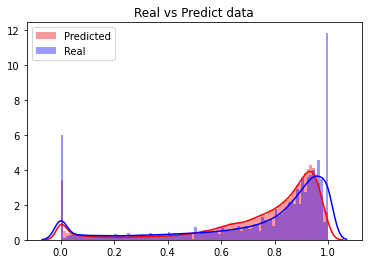

In [ ]:
#print ('R Squared =',r2_score(y_validate, y_pred))
print ('MAE =',mean_absolute_error(y_validate, y_pred))
print ('MSE =',mean_squared_error(y_validate, y_pred))
print ('RMS =',sqrt(mean_squared_error(y_validate, y_pred)))
# sns.distplot((y_pred),bins=50, color="B", axlabel='Y Predicted Value', label='Beta value - Predicted values vs Real Values');
# sns.distplot((y_validate),bins=50, color="Y", axlabel='Y Predicted Value', label='Beta value - Predicted values vs Real Values');
# # sns.lmplot( x='x', y='y', data=df, fit_reg=False, hue='x', legend=False, palette="Blues")
sns.distplot((y_pred),bins=100,color="r", label="Predicted")
sns.distplot((y_validate),bins=100,color="b", label="Real")
plt.title("Real vs Predict data")
plt.legend()
clf.score(x_validate,y_validate)

In [ ]:
clf.score(x_test,y_test)

0.5109833007758551